## Add Wrong answers

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../datasets/final/en/asag_v2_en_full.csv', sep='~', index_col=False)
df.head(1)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [18]:
from nltk.corpus import brown

def create_wa_row(row, wa):
    return [
        row['ID'], row['AID'], row['QID'], row['Prompt'],
        row['MA'], row['MA2'], row['MA3'], row['NA'],
        wa, 0, 'wrong_unrelated', 'missed_concept', 0, 0, 0
    ]

def create_wrong_answer():
    file_ids = brown.fileids()
    file_ids_idx = np.random.choice(len(file_ids))
    file_id = file_ids[file_ids_idx]
    
    sents = brown.sents(file_id)
    sents_idx = np.random.choice(len(sents))
    sent = sents[sents_idx]
    
    return ' '.join(sent)
    
def add_wrong_answers(df, n=5, short_wrongs=[], random_seed=42):
    np.random.seed(random_seed)

    new_rows = []
    columns = df.columns
    curr_id = df['Prompt']
    prev_id = '[start]'
    
    for index, row in df.iterrows():
        curr_id = row['Prompt']
        new_rows.append(row.as_matrix())
        
        
        if curr_id != prev_id:
            wrongs = short_wrongs.copy()
            wa1 = row['Prompt']
            wrongs.append(wa1)
            
            for i in range(0, n):
                wrongs.append(create_wrong_answer())
            
        
            for wa in wrongs:
                wa_row = create_wa_row(row, wa)
                new_rows.append(wa_row)
    
        prev_id = curr_id
        
    return pd.DataFrame(new_rows, columns=columns)
        
res = add_wrong_answers(df, 5, short_wrongs=['no idea', "sorry, don't know", "oops!", "I do not know", "whatever", "this is hard"], random_seed=42)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   
2  1.1    1    1   What is the role of a prototype program in pr...   
3  1.1    1    1   What is the role of a prototype program in pr...   
4  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   
2   To simulate the behaviour of portions of the ...   
3   To simulate the behaviour of portions of the ...   
4   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   
2  to provide an example and feedback of how the ...   
3  to provide an example and feedback of how the ...   
4  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   
2  to serve as a proof of concept and illustrate ...   
3  to serve as a proof of concept and illustrate ...   
4  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   
2  to find errors or collect data   
3  to find errors or collect data   
4  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1                                            no idea        0   
2                                  sorry, don't know        0   
3                                              oops!        0   
4                                      I do not know        0   

           Feedback  Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect             NaN    3.5             2             1  
1   wrong_unrelated  missed_concept    0.0             0             0  
2   wrong_unrelated  missed_concept    0.0             0             0  
3   wrong_unrelated  missed_concept    0.0             0             0  
4   wrong_unrelated  missed_concept    0.0             0             0

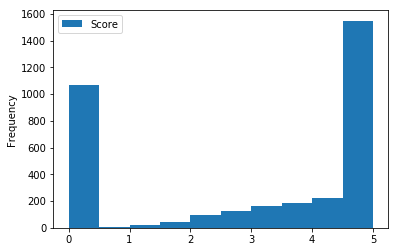

In [19]:
display(res.head())
res[['Score']].plot(kind='hist')

In [21]:
res.to_csv('../../datasets/final/en/asag_v2_en_full_wa.csv', sep='~', index=False)